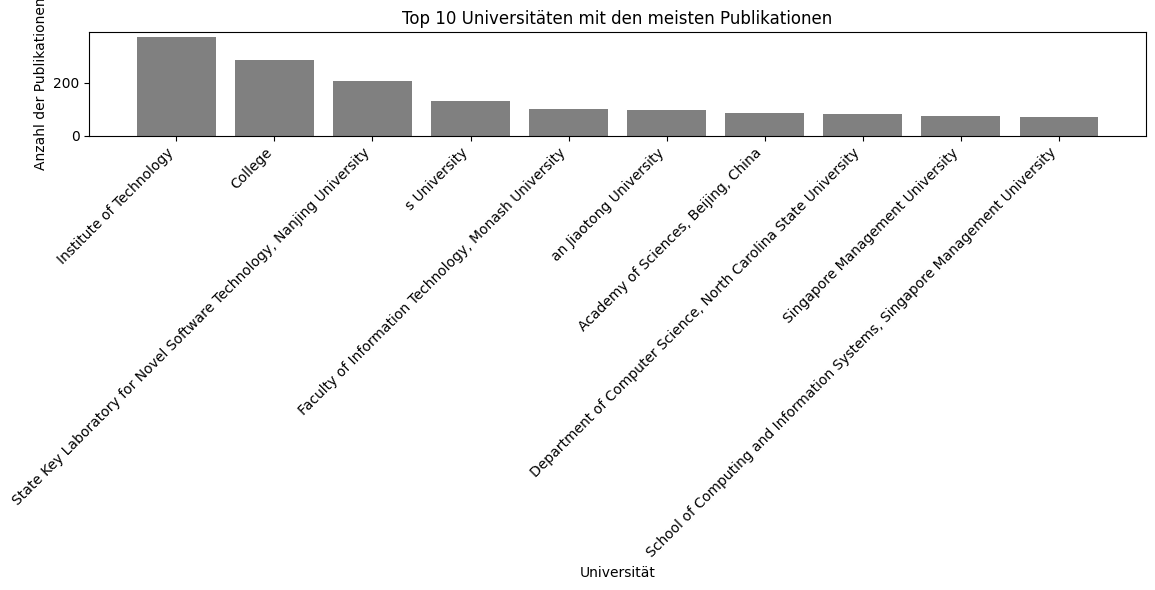

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import re

# Den Pfad zur CSV-Datei definieren (angenommen, sie liegt im 'data'-Ordner deines Projekts)
csv_file_path = os.path.join(os.getcwd(), '..', 'Data', 'Dataset.csv')

# CSV-Datei einlesen
df = pd.read_csv(csv_file_path)

# Funktion zur verbesserten Extraktion von Universitäten
def extract_universities_from_affiliation(affiliation):
    # Regex, um Universitäten mit Kontext zu erfassen
    pattern = r"\b(?:[A-Za-z\s,]*University|Institute of Technology|Polytechnic|College|Academy)\b(?:\s*of\s*[A-Za-z\s,]*)?"
    matches = re.findall(pattern, affiliation, re.IGNORECASE)
    return [match.strip() for match in matches if match.strip()]

# Test der Funktion mit einem Beispiel
example_affiliation = "Empirical Software Engineering Laboratory ECE, University of Texas, Austin, USA; Department of Electrical & Computer Engineering, Stevens Institute of Technology, Hoboken, USA"

# Entferne NaN-Werte aus der Spalte "Author Affiliations"
affiliations = df["Author Affiliations"].dropna()

# Alle Universitätsnamen extrahieren
university_list = []
for aff in affiliations:
    matches = extract_universities_from_affiliation(aff)
    if matches:
        university_list.extend(matches)

# Zähle die Häufigkeiten der Universitäten
university_counts = Counter(university_list)

# Top 10 Universitäten nach Anzahl der Publikationen
top_10_universities = university_counts.most_common(10)

# In ein DataFrame umwandeln für die Visualisierung
top_10_df = pd.DataFrame(top_10_universities, columns=["University", "Publication Count"])

# Ergebnisse visualisieren
plt.figure(figsize=(12, 6))
plt.bar(top_10_df["University"], top_10_df["Publication Count"], color='gray')
plt.title("Top 10 Universitäten mit den meisten Publikationen")
plt.xlabel("Universität")
plt.ylabel("Anzahl der Publikationen")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
